In [1]:

import numpy as np
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def smooth(scalars, weight: float)-> list:  # Weight between 0 and 1
    """
    exponential moving average
    Tensorboard-like smoothing
    """
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [3]:
def removeOutliers(x, outlierConstant=1.5) -> list:
    arr = np.asarray(x)
    upper_quartile = np.percentile(arr, 75)
    lower_quartile = np.percentile(arr, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)

    result = arr[np.where((arr >= quartileSet[0]) & (arr <= quartileSet[1]))]

    return result.tolist()

In [4]:
# env_id = "HalfCheetah-v2"
# env_id = "Hopper-v3"
env_id = "NavEnv-v0"

agent_df = pd.read_csv(f'{env_id}/{env_id}_results.csv')
expert_df = pd.read_csv(f'{env_id}/{env_id}_expert.csv')

In [39]:
a = pd.read_csv("absorbing.csv")
a.head()

,global_step,GAIL-v0_abs_new_finite - _step,GAIL-v0_abs_new_finite - _step__MIN,GAIL-v0_abs_new_finite - _step__MAX,GAIL-v0_abs_new_finite - return/test/ep_rew_mean,GAIL-v0_abs_new_finite - return/test/ep_rew_mean__MIN,GAIL-v0_abs_new_finite - return/test/ep_rew_mean__MAX,GAIL-v0_abs_new_infinite - _step,GAIL-v0_abs_new_infinite - _step__MIN,GAIL-v0_abs_new_infinite - _step__MAX,GAIL-v0_abs_new_infinite - return/test/ep_rew_mean,GAIL-v0_abs_new_infinite - return/test/ep_rew_mean__MIN,GAIL-v0_abs_new_infinite - return/test/ep_rew_mean__MAX,GAIL-v0_off_samp - _step,GAIL-v0_off_samp - _step__MIN,GAIL-v0_off_samp - _step__MAX,GAIL-v0_off_samp - return/test/ep_rew_mean,GAIL-v0_off_samp - return/test/ep_rew_mean__MIN,GAIL-v0_off_samp - return/test/ep_rew_mean__MAX
0,10000,0,0,0,16.693550,16.693550,16.693550,0,0,0,16.502131,16.502131,16.502131,0,0,0,283.443756,283.443756,283.443756
1,15000,3,3,3,101.166557,101.166557,101.166557,3,3,3,8.924406,8.924406,8.924406,3,3,3,235.022003,235.022003,235.022003
2,20000,6,6,6,342.611755,342.611755,342.611755,6,6,6,785.904968,785.904968,785.904968,6,6,6,166.493179,166.493179,166.493179
3,25000,9,9,9,336.826904,336.826904,336.826904,9,9,9,399.491577,399.491577,399.491577,9,9,9,387.067627,387.067627,387.067627
4,30000,12,12,12,524.355469,524.355469,524.355469,12,12,12,376.994019,376.994019,376.994019,12,12,12,273.841980,273.841980,273.841980


In [40]:
a.columns

Index(['global_step', 'GAIL-v0_abs_new_finite - _step',
       'GAIL-v0_abs_new_finite - _step__MIN',
       'GAIL-v0_abs_new_finite - _step__MAX',
       'GAIL-v0_abs_new_finite - return/test/ep_rew_mean',
       'GAIL-v0_abs_new_finite - return/test/ep_rew_mean__MIN',
       'GAIL-v0_abs_new_finite - return/test/ep_rew_mean__MAX',
       'GAIL-v0_abs_new_infinite - _step',
       'GAIL-v0_abs_new_infinite - _step__MIN',
       'GAIL-v0_abs_new_infinite - _step__MAX',
       'GAIL-v0_abs_new_infinite - return/test/ep_rew_mean',
       'GAIL-v0_abs_new_infinite - return/test/ep_rew_mean__MIN',
       'GAIL-v0_abs_new_infinite - return/test/ep_rew_mean__MAX',
       'GAIL-v0_off_samp - _step', 'GAIL-v0_off_samp - _step__MIN',
       'GAIL-v0_off_samp - _step__MAX',
       'GAIL-v0_off_samp - return/test/ep_rew_mean',
       'GAIL-v0_off_samp - return/test/ep_rew_mean__MIN',
       'GAIL-v0_off_samp - return/test/ep_rew_mean__MAX'],
      dtype='object')

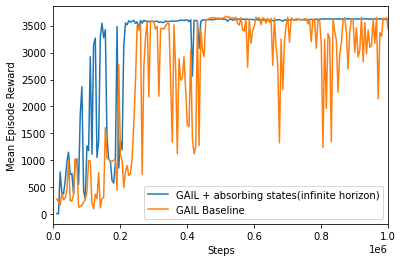

In [46]:
# plt.plot(a["global_step"], a["GAIL-v0_abs_new_finite - return/test/ep_rew_mean"], label='finite horizon')
plt.plot(a["global_step"], a["GAIL-v0_abs_new_infinite - return/test/ep_rew_mean"], label='GAIL + absorbing states(infinite horizon)')
plt.plot(a["global_step"], a["GAIL-v0_off_samp - return/test/ep_rew_mean"], label='GAIL Baseline')
plt.xlabel('Steps')
plt.xlim(0, 1000_000)
plt.ylabel('Mean Episode Reward')
plt.legend()
plt.show()

In [5]:
agent_df.head()
t_agent = agent_df["global_step"]
t_expert = expert_df["global_step"]

In [6]:

agent_rews = np.array(agent_df["Grouped runs - return/test/ep_rew_mean"]).copy()
expert_rews = np.array(expert_df["Grouped runs - return/test/ep_rew_mean"]).copy()
                        # HalfCheetah-v2/sac/seed0-20210722-0035 - return/test/ep_rew_mean"]

In [7]:
weight = 0.0 # No Smoothing
# weight = 0.6
smoothed_expert_rews = np.asarray(smooth(expert_rews, weight=weight)).reshape(-1, 1)
smoothed_agent_rews = np.asarray(smooth(agent_rews, weight=weight)).reshape(-1, 1)

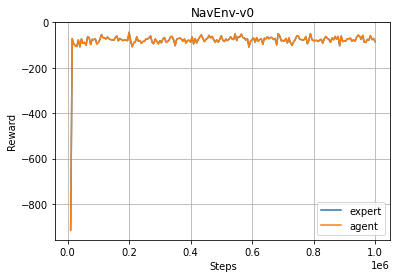

In [8]:

plt.plot(t_expert, smoothed_expert_rews, label='expert')
plt.plot(t_agent, smoothed_agent_rews, label='agent')
plt.title(env_id)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(smoothed_expert_rews)
print(scaler.data_min_, scaler.data_max_)
expert_scale = scaler.transform(smoothed_expert_rews)
agent_scale = scaler.transform(smoothed_agent_rews)


[-914.12046305] [-43.35468928]


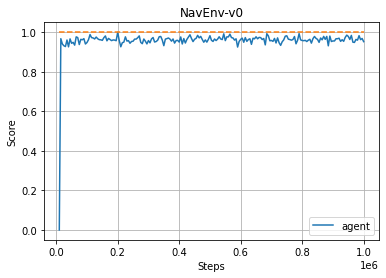

In [10]:

# plt.plot(t_expert, expert_scale, label='expert')
plt.plot(t_agent, agent_scale, label='agent')
plt.plot(t_agent, np.ones_like(t_agent, dtype=np.int8), '--')
plt.title(env_id)
plt.xlabel('Steps')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()